___

#### Group 2:
#### DJ Dawkins, Rick Fontenot, Joe Lazarus, Puri Rudick
___



# Minilab 

This notebook will cover the following topics in order:

 1) Review <br />
* Business Understanding <br />
* Data Meaning Type <br />
* Data Quality - handling missing values <br />
* New Features <br />

2) Mini Lab <br />
* Check for multicollinearity and subset useful variables for predictions <br />
* Data Prep: one-hot-encoding <br />
* Create test/train splits, scaling for modeling and cross validation framework <br />
* Logistic Regression <br />
        - assess Logistic Regression Performance 
        - Adjust parameters of the models to make it more accurate 
* Support Vector Machine <br />
        - Assess SVM performance 
        - Adjust parameters of the model to make it more accurate
* Discuss advantages of each model for each classification <br />
* Look at the chosen support vectors for the classification task and discuss if they provide any insight into the data <br />

____

# Section 1: Business Understanding

<p><b>Who</b>:      Airbnb is an online market place that connects people. It acts as an intermediary between those who wish to rent out their homes with people looking for accommodations in that locale. In that way Airbnb does not does not own any properties. Airbnb makes money by charging a service fee. The service fee is a percentage of the total bill to both guests and hosts. Hosts are responsible for the management of the property. They must buy or rent the property, coordinate with guests, and clean up after them. </p>

<p><b>Where</b>:        The data comes from <a>http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz</a>. This website was funded by Murray Cox. The site is not associated with or endorsed by Airbnb or their competitors. The data utilizes public information compiled from the Airbnb website. Listings on Airbnb can be deleted from the platoform. The data presented by Inside Airbnb represents a snapshot at a particular time, August 4, 2021 </b> Our particular focus is on NYC, New York.</p>

<p><b>What</b>:         We want to use this data to predict the following:<br>
<br />
    <ol> 
        1. <b>Superhost</b> <br>
        <br />
        - With the data we will predict Superhost status. This is a classification problem. <br>
        <br />
        - In order to measure the effectiveness of our model we will accuracy as our metric.<br>
        <br />
        2. <b>Price</b> <br>
        <br />
            - With the same data set will predict price of a listing. This is a regression problem. <br>
        <br />
            - In order to measure the effectiveness of our model we will use Root Mean Squared error (RMSE).
</ol>
</p>

<p><b>Why:</b>       Why is our analysis important. The superhost badge is a big deal to people who host on Airbnb. It means greater visibilty and increase in trust with prospective guests. This adds up to loss of potential earnings if denied access. Is Airbnb consistent with their superhost rating? Airbnb publish guidlines for becoming a superhost. Are they consistent when it comes to applying these rules or is the some bias towards certain types of hosts?<br> Hosts set their own price. There is an incentive to maximize price. But what factors are most important? Setting the correct price to the market allows hosts to reach the full capitalization potential of their listing. </p>

## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno

### Load the raw data

NYC Airbnb data obtained from http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz

In [2]:
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")


Using head to check out the data. The data set includes many columns. In the following the sections we will reduce the columns. Not all the columns will be kept.  

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,6,36,66,341,2021-08-04,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,1,7,212,2021-08-04,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-08-04,50

**Examine data types**: Many variables need cleaning and conversion. Handle string replacements, boolean, and date variables individually before creating overall dictionary for all data types <br>
<br />
Using the "dtypes" method reveals the data structure of each column. In following sections we work to get each column in the appropriate data structure.

In [4]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

**Boolean Variables**: 

The data comes with (4) variables with "t", "f". Pandas doesn't recognize this as a Boolean Value. What we need to do is replace them with actual boolean values (True/False) that pandas recognizes while preserving NA to be converted to boolean. 
- **host_is_superhost** (target variable)	
- host_has_profile_pic	
- host_identity_verified	
- has_availability	
- instant_bookable

In [5]:
#Create function to convert t/f to boolean, included if statement so it doesn't error if run multiple times
def tf_to_bool(dataframe, variable,name):
    if str(variable.dtypes)!='boolean':
        dataframe["temp_boolean"]=np.nan
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe.temp_boolean = np.where(
            variable == 't', True, np.where(
            variable ==  'f', False, np.nan))
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe = dataframe.drop(name, axis=1)    
        dataframe.rename({'temp_boolean': name}, axis=1, inplace=True)
        return dataframe
    else:
        return dataframe

listings = tf_to_bool(listings,listings.host_is_superhost,'host_is_superhost')
listings = tf_to_bool(listings,listings.host_has_profile_pic,'host_has_profile_pic')
listings = tf_to_bool(listings,listings.host_identity_verified,'host_identity_verified')
listings = tf_to_bool(listings,listings.has_availability,'has_availability')
listings = tf_to_bool(listings,listings.instant_bookable,'instant_bookable')

### Regular Expressions

**Price** : our other target variable, is currently an object data type. We need to convert this to a floating point integer. This requires the use of a regular expression to remove "$" and "," from string and convert to float.

In [6]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0

object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


**Percentage signs**
Columns with percentages need "%" removed to convert to numeric:
- host_response_rate
- host_acceptance_rate

In [7]:
print(listings.host_response_rate.dtypes) #initial type is object
print(listings.host_response_rate.loc[[299]]) #original value "100%"
listings.host_response_rate = listings.host_response_rate.replace('%', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.replace('%', '', regex=True).astype(float)
print(listings.host_response_rate.dtypes) #transformed type is float64
print(listings.host_response_rate.loc[[299]]) #new value is 100.0

object
299    100%
Name: host_response_rate, dtype: object
float64
299    100.0
Name: host_response_rate, dtype: float64


**Date Variables**  need to be converted based on string format before updating the data type. All the date columns are using the same military date format which is a numerical representation of year-month-day seperated by a hyphon. EG 2012-01-01 is January first, two thousand twelve. The same strategy can be applied to each of the following date columns: 
- last_scraped
- host_since
- calendar_last_scraped
- first_review
- last_review

In [8]:
date_vars = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
listings[date_vars] =  listings[date_vars].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')


**Text Parsing**  bathrooms_text in its current form is not atomized. Meaning it contains more than more piece of information. It contains the Numeric quantity bathrooms and string values describing if it is shared or private. Create dictionary to parse strings and create two new variables of correct type.<br>
<br />

This work goes beyond the scope of data type and into **Data Quality** and **New Features** If we decide to present this for credit, we will present this work again in those sections.<br>
<br/>
Two new columns are being created from *bathroom_text*: **num_baths** and **bath_type**
- **num_baths** will be a floating point value
- **bath_type** will be a categorical value.

In [9]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')
 


### Dropping bathroom_text 
num_baths and bath_type now represent the data that was contained in bathroom_text

In [10]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


### Check Work
Check current data types for all variables before converting to desired types

In [11]:
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_response_rate                                     

### Data Type Dictionary
In this step we are coercing the pandas to recognize the columns in the data type that best represents each particular type of observation.<br>
<br />
To do so Data Type dictionary is created and convert all variables to proper format and bit sizes based on the key value pair.

In [12]:
convert_dict = {'id': 'Int16',
'scrape_id': 'Int64',
'last_scraped': 'datetime64[ns]',
'host_id': 'Int16',
'host_name': str,
'host_since': 'datetime64[ns]',
'calendar_last_scraped': 'datetime64[ns]',
'host_response_time': 'category',
'host_response_rate': 'float64',
'host_acceptance_rate': 'float64',
'host_is_superhost': bool,
'host_neighbourhood': 'category',
'host_listings_count': 'Int16',
'host_total_listings_count': 'Int16',
'host_verifications': str,
'host_has_profile_pic': bool,
'host_identity_verified': bool,
'neighbourhood': str,
'neighbourhood_cleansed': 'category',
'neighbourhood_group_cleansed': 'category',
'property_type': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'bedrooms': 'Int16',
'beds': 'Int16',
'amenities': str,
'price': 'float64',
'minimum_nights': 'Int16',
'maximum_nights': 'Int16',
'minimum_minimum_nights': 'Int16',
'maximum_minimum_nights': 'Int16',
'minimum_maximum_nights': 'Int16',
'maximum_maximum_nights': 'Int16',
'minimum_nights_avg_ntm': 'Int16',
'maximum_nights_avg_ntm': 'Int16',
'has_availability': bool,
'availability_30': 'Int16',
'availability_60': 'Int16',
'availability_90': 'Int16',
'availability_365': 'Int16',
'number_of_reviews': 'Int16',
'number_of_reviews_ltm': 'Int16',
'number_of_reviews_l30d': 'Int16',
'first_review': 'datetime64[ns]',
'last_review': 'datetime64[ns]',
'review_scores_rating': 'float64',
'review_scores_accuracy': 'float64',
'review_scores_cleanliness': 'float64',
'review_scores_checkin': 'float64',
'review_scores_communication': 'float64',
'review_scores_location': 'float64',
'review_scores_value': 'float64',
'instant_bookable': bool,
'calculated_host_listings_count': 'Int16',
'calculated_host_listings_count_entire_homes': 'Int16',
'calculated_host_listings_count_private_rooms': 'Int16',
'calculated_host_listings_count_shared_rooms': 'Int16',
'reviews_per_month': 'float64',
'num_baths': 'float64',
'bath_type': 'category'
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                Int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                    category
host_response_rate                                     

### Removing columns we cannot interpret 
There's a lot of information for each listing. We only want to keep the most relevant data. The data set did not come with a definition of terms. Some columns we are not able to work out what they represent. Thus we will remove these columns and not present them in the Data Meaning and Type. 


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

In [13]:
listings.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
               'maximum_maximum_nights' ,'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
               'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms'], axis=1, inplace = True)

### Removing columns we don't intend to work with
There's a lot of information for each listing. We only want to keep the most relevant data. There are columns we do not intend to use in our analysis 
- listing_url
- scrape_id
- name
- picture_url
- host_url
- host_thumbnail_url
- host_picture_url

In [14]:
listings.drop(['listing_url','scrape_id','picture_url','host_url','host_thumbnail_url',
               'host_total_listings_count','host_picture_url','calendar_last_scraped'], axis=1, inplace = True)

# Section 2: Data Meaning and Type 
<p>

* **id** – The ID column is the unique four-digit number given to a particular listing. To be more explicit this column is listing ID. The column serves as a primary key for a particular property. Values are int64.<br>
<br />
* **name** - The name column is the name apellation given to the listing by the host. The host creates a moniker for each listing they put on Aibnb. It can describe the property and entice would be guests to stay there. It is an object data type that contains a string value.<br>
<br />
    
* **last_scraped** - Datetime64[ns] data type. Describing the date the listing was last scraped using inisdearibnb.com web api.<br>
<br />
* **description** - Hosts on Airbnb are invited to give their listing a description. This serves to help guests gain understanding about the listing. According to [Airbnb](https://www.airbnb.com/resources/hosting-homes/a/sprucing-up-your-listing-description-13), "A great listing description is one of your best tools for securing bookings and setting guests’ expectations. We’ve learned from Superhosts that your property doesn’t have to be perfect, but it’s crucial to tell guests exactly what they’ll find when they arrive..." It is an object data type contain a string of characters. <br>
<br />
* **host_ID** – Host ID is four-digit number that servers as a primary key for a host. Hosts are those who have rights to a certain property through ownership, leases or granted managerial authority. There is no limit to the number of properties they can list on Airbnb. Guests and Hosts have the abilitly to read one another’s profiles. Guests might be influenced by a Hosts reviews or status as a super host. Data type of int64. <br>
<br />
* **host_Name** – Is typically the first name of the host. This column data type of object made up of character strings. Host are property owners/managers of a given property. Guests and Hosts first names are available to users on Airbnb. Sharing this piece of information allows users personally address one another as they coordinate stays. By withholding last names, a bit of user privacy is preserved.<br>
<br />
* **host_Since** – This column reflects the date at which a host listed their first property with Airbnb. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. Data type datetime64[ns].  <br>
<br />
* **host_location** - Object data type made up of character strings that details where the host is located. Given in the format City, State, Country. Hosts may or may not be co-located in the same city. There is no limit to the number of properites a host can list. Only that they provide to Airbnb proof of rights to a particular property in order to list it on the website. <br>
<br />
* **host_about** - Object data type made up of character strings that provides background information regarding the host. Written by the host to prospective guests. This about allows guests to get a sense of who they are renting the property from. <br>
<br />    
* **host_response_time** -  This column's data type is category that approximates how long it takes for a host to reply to an inquiry. The strings have a ordinal relationship. The fastest to slowest response are denoated as: “within an hour”, “within a few hours”, “within a day”, “a few days or more”. This information is available on the website to prospective guests. <br>
<br />
* **host_response_rate** – This column is a percentage of how often a host replies to an inquiry sent to them on the Airbnb website. The data type is int16. The values are continuous from  0 through 100. This information is available on the Airbnb website to prospective guests. <br>
<br />
* **host_acceptance_rate** –  Conintous values from 0-100 and data type int16. This column is a percentage of how often a host will accept a guests request to stay vs reject this request. from  On Airbnb guests have the ability to choose their accommodations. Likewise, Hosts can accept or reject a guests request to stay. This could be a factor of scheduling and timing. Or a factor of a guests poor rating. Hosts and guests rate one another after a stay. The cumulative rating servers as a social credit on the website. This can influence a hosts decision to accept a guests request to stay at their place. <br>
<br />
* **host_neighborhood** -  Category data type denoted the which neighborhood in New York city the listing comes from. The total number of possible neighborhoods are 450. The list contains neighborhoods outside of New York. It maybe it is referencing another neighborhood where the host owns and lists properties. <br>
<br />
* **host_listings_count** – Numeric value of the number of properties a host has listed on Airbnb. The count is not limited to the New York City geographical area that we are focusing on for this project. Data type of int16. Values range from blank, 0 – 3966. <br>
<br />
* **host_verifications** – The coloumn is a list of strings values denoting the method in which as host as verified their identity. Typical methods include government ID, email, phone, and reviews. This process ensures safety and that the host is at least 25 years old.  <br>
<br />

* **neighbourhood** - Object data type of category denoted the which neighborhood in New York city the neighborhood the listing is located in. This value also includes the city, and country. List contains 209 unique values. <br>
<br />
* **neighborhood_overview** - Object data type string describing the neighborhood where the listing in located within NYC, NY. <br>
<br />    
* **neighbourhood_cleansed** – Object data tyoe of category indicating the neighborhood where the listing is located. Contains 223 unique values. <br>
<br />
* **latitude** – Is measurement on a globe or map of location north or south of the equator. Geocentric latitude, which is the most common and one used here, is the arc subtended by an angle at Earth’s centre and measured in a north-south plane poleward from the Equator. Stated as floating point number (float64). Read as Degrees, minutes, seconds and decimal seconds (DMS). A far more gentlemanly way of referncing geocentric location is MGRS and is the preferred method amongst the more refined cartographic users.<br>
<br />
* **longitude** – Is a measurement of location east or west of the prime meridian at Greenwich, the specially designated imaginary north-south line that passes through both geographic poles and Greenwich, London. Also measured in degrees, minutes, seconds, and decimal seconds, longitude is the amount of arc created by drawing first a line from Earth’s centre to the intersection of the Equator and the prime meridian and then another line from Earth’s centre to any point elsewhere on the Equator. Stated as floating point number (float64).<br>
<br />
* **property_type** – Category describing the type of rental the host is offering. For example, entire rental unit, entire guest house, shared room in guest house, entire villa, shared room in loft. Contains 75 unique values. <br> 
 <br />   
* **Room_type** – Category that is a more general description of the listed property type. Contains 4 unique values. Entire home/apt, private room, hotel room, shared room.   <br>
<br />    
* **Accommodates** – Int16 data type of numeric values describing how many people the listed property can accommodate at one time. List is between 0 – 15. <br>
<br />

* **Bedrooms** – Int16 data type indicating the number of bedrooms the listing contains. The values range from 1 – 14. 
<br />    
* **Beds** – Int16 data type indicating how many beds the listed property has. A bedroom may contain more than bed. Contains 22 unique values from nan \& 1-42.   <br>  
<br />
* **amenities** – Object data type contains list of string values indicating desirable features the host provides as part of the listing.  According the Airbnb website “essentials” indicates toilet paper, soap (for hands and body), one towel per guest, one pillow per guest, linens for each guest bed. There are 30485 unique values in this column.<br>
<br />    
* **price** -  Float16 value indicating the cost per night to stay at the listing. Values range from 0 – 10,000 in U.S. Dollars. There are 853 unique values in this column.<br>
<br />
* **minimum_nights** -  This value is a Int16. This column indicates the number minimum number of nights a guest must reserve the listing for. Values range from 1 – 1250. With 128 unique values. <br>
<br />    
* **maximum_nights** -  Int64 data type ranging from 1 – 2147483647.  This is the maximum number of nights a guest my reserve the property for. <br>
<br />

* **availability_30** – The number of nights the listing is available within the next 30 days. The availability could be a factor of bookings. Can also be a factor of the host living in the property, since some properties listed on Airbnb are hosts primary residence.Int16 Values range from 0-30. 50% of the observations have 0 availability. The mean is 7.03 std of 10.5.   <br>  
<br />
* **availability_60** – Similar meaning to the previous column except that it extends the time horizon out to 60 days. Float values but for intents and purposes are an integer value. 50% of the properties have 2 or fewer nights available. Mean is 16.7 with std of 21.8. Int16 values range from 0-60.<br>
<br />
* **availability_90** – This column extends the availability time horizon out to 90 days. 50% of the listing have 5 nights or fewer. Mean is 28.2 std of 34.03. Int16 values range from 0 - 90. <br>
<br />
* **availability_365** – This column extends the availability time horizon of a listing out to 365 days. 50% of the listings have 57 nights or fewer. Mean is 122.5 std of 138. Int16 Values range from 0-365.<br>
<br />
* **number_of_reviews** -  Int16 values. This represents the total number of reviews a property has. After a stay a guest may write a review of the property at which they stay at. They may comment on the property and the host. Values range from 0 – 998. 50% of the properties have 4 or fewer reviews. Mean is 22.8 std is 49.18.<br>
<br />
* **number_of_reviews_ltm** – Similary to the previous column but the lookback window is _last twelve months (LTM)_.  Max value is 669. 75% of the observations have 0 or fewer reviews. Int16 value. Values range from 0-669. <br>
<br />
* **number_of_reviews_l30d** – Similar to the previous column except the lookback window is limited to past (last) 130 days. 75% of the observations have 0 reviews. Max value is 172. 25 observations. 6560 observations do contain reviews. Int16 data type.
<br />    
* **first_review** – Datetime64[ns] data type. Date at which a listed property was first reviewed. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. There are 9,415 observations without a first review.<br>
<br />
* **last_review** – Datetime64[ns] data type. Date at which a listed property received its most recent (aka last) review. The data set uses military format, a numerical representation of year month day delineated by a hyphen. Example 2012-01-09. There are 9,415 observations without a last review. <br>
<br />
* **review_scores_rating** -  Guests who have stayed at a listing may rate the listing on a scale from 0-5. The mean is 4.5. Values range from 0-5. There are 158 unique ratings. 9415 observations do not have a rating. Scaled values using the star rating system from 0-5  float16 data type. <br>
<br />
    
*The following (6) columns are detailed ratings. Ratings use a commonly understood star review system, scaled from 0-5 and given as a floating point number.  Guests who've stayed at the listing are invited to rate the hosts listings with respect to certain aspects of the stay. 1) Accuracy, 2) cleanliness, 3) communication, 4) location, 5) check in, 6) value. The score related to each of the 6 categories becomes part of the hosts and listings cumulative rating. Guests available to view this rating on the Airbnb website.* <br>
<br />

* **review_scores_accuracy** –  Float16 data type. Scaled from 0-5 guests are asked to rate how accurately the host described the property on the Airbnb website. 26,661 listings have a score. The mean is 4.7 std 0.48. 158 unique ratings exists within this data frame and 10,063 observations do not have an accuracy score. <br>
<br />
* **review_scores_checkin** – Float16 data type. Scaled from 0-5 guests are asked to rate how easy the check-in process was. 26,672 have a rating. Mean is 4.61, std 0.57 values range from 0-5, with 199 unique ratings. 10,071 do not have a check in rating. <br>
<br />
* **review_scores_communication** – Float16 data type. Scaled 0-5 guests are asked to rate how promptly a host responds to guests messages on the Airbnb website. 26,664 observations have a rating. The mean is 4.8 std 0.45 values range from 0-5. 10,060 observations do not have a communication rating. <br>
<br />
* **review_scores_location** – Float16 data type. Scaled 0-5 guests are asked to rate the listing based on “Was the guest made aware of safety, transportation, points of interest and special considerations like noise or other situations that might affect their stay?” [Refernce: Airbnb help ratings](Aibnb.com/help/ratings). 26,664 observations have a rating. The mean is 4.8 std is 0.45 ranging from 0-5. 10,075 do not have a location rating. <br>
<br />
* **review_scores_value** – Float16 data type. Scaled 0-5 guests are asked to rate the listing based on “Was it worth the price?” [Refernce: Airbnb help ratings](Aibnb.com/help/ratings) 26,649 listings have a value rating. The mean is 4.65 std 0.5. values range from 0-5. 158 unique ratings within the column and 10,075 do not have a value rating. <br>
<br />

    _End of detailed review columns._ <br>
<br />

* **calculated_host_listings_count_entire_homes** – Int16 value describing the number of entire homes a host has available on Airbnb website or just NYC? Entire home meaning the guest will the entire domicile to themselves. An entire place usually includes bedroom, a bathroom, and a kitchen. Hosts should make note if they will be on the property for example, host occupies first floor of home. – [Refernce: Airbnb select your home type](Airbnb.com/help/article/317/select-your-home-type) Vales range from 0-286. 75% of the observations have 1 of fewer. Mean is 6.5 std 29.9 and no missing values. <br>
<br />
* **calculated_host_listings_count_private_rooms** – Int16 value describing the number of private rooms a host has available on Airbnb. With private rooms guests will have the their own room for sleepin. Other areas such as kitche or living room, could be shared. Whether or not guests will have their own bathroom should listed in the description.[Refernce: Airbnb select your home type](Airbnb.com/help/article/317/select-your-home-type) values range from 0-276. Mean is 6.7 std 31.16. 75% of the observations have 1 or fewer.<br>
<br />
* **reviews_per_month** – Int16 value denoting how many reviews as listing has received per month / or hosts received per month?. ?how is this calculated? A ratio of the number of reviews divided by the total number of months this listing has been on Airbnb website. Vales range from 0.01 – 192.93. Mean is 1.3 std of 3.85. 9,415 observations are null.  <br>
<br />
* **host_is_superhost** -  Boolean value True / False stating whether host meets condition of currently having the the status of “Superhost”. From Airbnb website “Every 3 months, each host is evaluated on their hospitality. Superhosts meet all of the criteria – they’re highly rated, experienced, reliable, and responsive.” They must meet certain criteria of; 4.8+ rating, 10+ stays, 1% cancellation rate, and 90% response rate.  The number one benefit of being a Superhost is that it improves the visibility of your listings. For one, there is a super host only filter. Superhost properties are more likely to be featured in Airbnb newsletters and curated lists on the Airbnb website. Becoming a super host and sporting the superhost badge builds trust and allows guests to stand out from the crowd. Having the superhost badge my allow hosts to increase their rates. From the host tools website, “Guests expect a higher level of service and a better experience from Superhosts, so it’s likely that they’re willing to pay more.” [From Airbnb website: How to become a SuperHost](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost).<br>
<br />
* **host_identity_verified** – Boolean value True False of whether or not the host has verified their identity. This value confirms the methods used in host_verifications passed Airbnb’s verification process. <br>
<br />
* **host_has_profile_pic** – Boolean value True / False denoting whether or not the host as uploaded a profile picture. The profile does not necessiarly mean it is of the hosts face. <br>
 <br />   
* **has_availability** – Bool value True / False indicating whether a listing is available at some time. 2096 observations are listed as (False), and 34,628 are (True). <br>    
<br />
* **instant_bookable** – Bool value True / False indicating whether or not a listing has the feature of “instant book” instant book allows prospective guests on the Airbnb website to immediately book without needing to send a request to the Host for approval. Feature is provided at no additional costs. Drawback to hosts is they lose some measure of control over who is booking their listing. 26,967 are not instant bookable and 9,757 are instant bookable. No missing values in this column.  <br>
<br />
* **num_baths** - Float16 value describing the number of baths a listing has. Half bath is represented by point five decimal. Indicating the bathroom does not contain a shower facility. E.G. 1.5 indicated 1 full bath that includes a toilet and shower with an additional facility that only contains a toilet. This column was created by parcing bathroom text. There are (20 ) unique values range from nan, 0 - 15.5 <br>
<br />
* **bath_type** - Category feature describing if the bathrooms at the listing are "shared", "private" or nan (information is not listed). Shared indicates that other guests or hosts may have access to the facility during the guests stay. Private means the guests will have the bathroom facility to themselves. <br>    
</p>

# Section 3: Data Quality

1) Missing values check

2) Handling missing values

3) Check for duplicates

### Check missing values
This check is done to ensure we've preserved the data integrity and its missing values.

In [15]:
listings.isna().sum()

id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                         0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


### Function to convert null values in neighbourhood to np.nan data type
Although the neighbourhood variable showed 0 NA in the isna() summary tables we noticed through viewing the data that many were missing. After iterating through 10 tests against the strange na type upon import, we wrote a custom function to replace them with proper np.nan so that it would show up in the missing value reports and could be imputed.


In [16]:
# Missing values for neighbourhood not recognized by .isna, replace them with np.nan for further analysis.
def f(row):
    if str(row['neighbourhood']) == 'nan':
        val = np.nan
    else:
        val = row['neighbourhood']
    return val

listings['neighbourhood'] = listings.apply(f, axis=1)

# Then run .isna summary again
listings.isna().sum()


id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                     14132
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


## Preserving variables with missing values

For variables with  less than 1,000 missing values (less than 2.7% of observations), we chose not to impute. It may be the case that the lack of data is data in and of itself. Guests may be influenced by the lack of data when choosing a listing. During our analyses we will consider this. In certain cases we may filter. <br><br /> Those variables are:
* name
* host_since
* host_location
* host_thumbnail_url
* host_picture_url
* host_listings_count
* host_total_listings_count
* host_is_superhost
* host_has_profile_pic
* host_identity_verified
* has_availability
* instant_bookable
* num_baths (new variable)
* bath_type (new variable)

### Drop columns with 100% missing values (i.e. blank variables)

Easy decision to remove columns with no information. Getting rid of here so we don't have to discuss this in our data meaning and type write up. Didn't think you'd mind this step taking place here. 

In [17]:
listings.drop(['bathrooms','calendar_updated','license'], axis=1, inplace = True)

### Handling missing values in "Object" (string) data type 
Airbnb allows hosts to give detailed written descriptions. In some observations these text fields are blank. As mentioned before lack of data can be data in and of itself. Thus we don't want to disgard these observations. So we made a decision to give descriptions that are blank a string of "Missing".
For missing values in object and category data type variables, we didn't find correlations to other missing values or correlations to other missing values to impute. In ordered to perserve the rows we replaced missing values with "missing".

In [18]:
# Replace missing values in object data type variables.

listings.description.fillna("missing", inplace=True)
listings.neighborhood_overview.fillna("missing", inplace=True)
listings.host_about.fillna("missing", inplace=True)

### Handling missing values in "Category" data type

Similar to the text fields information can be missing. But we'd like to presrve the row. Thus for missing values in a category data type we used the following function. 

In [19]:
# Replace missing values in category data type variables.

# Function to impute null value with new category
def impute_nan_create_category(listings,ColName):
     listings[ColName] = np.where(listings[ColName].isnull(),"missing",listings[ColName])

## Call function to create new category for variables
for Columns in ['host_response_time', 'host_neighbourhood', 'neighbourhood']:
    impute_nan_create_category(listings,Columns)

### Handing missing values in "Numerical" data type
For missing value in numerical data type variables, since we could not find any correlations between the particular variables with others, we replaced all of the missing value with its mean, except for bedrooms that we replaced with it median because we want to keep its data type as integer.  For reviews_per_month, we know it is calculated from number_of_reviews/(last_scraped - first_review), so we looked at those 3 variables values, and replace the missing values with the result from the calculation.

In [20]:
# Replace missing values in numerical variables with its mean.
listings.host_response_rate.fillna(listings.host_response_rate.mean(), inplace=True)
listings.host_acceptance_rate.fillna(listings.host_acceptance_rate.mean(), inplace=True)
listings.review_scores_rating.fillna(listings.review_scores_rating.mean(), inplace=True)
listings.review_scores_accuracy.fillna(listings.review_scores_accuracy.mean(), inplace=True)
listings.review_scores_checkin.fillna(listings.review_scores_checkin.mean(), inplace=True)
listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness.mean(), inplace=True)
listings.review_scores_communication.fillna(listings.review_scores_communication.mean(), inplace=True)
listings.review_scores_location.fillna(listings.review_scores_location.mean(), inplace=True)
listings.review_scores_value.fillna(listings.review_scores_value.mean(), inplace=True)

# Replace missing values in numerical variables with its median.
listings.bedrooms.fillna(listings.bedrooms.median(), inplace=True)

### Handling missing values in Ratios
The ratio calculated by review per month will produce and error when a listing does not have a reivew yet. 


In [21]:
# Replace missing value in reviews_per_month based on value in last_scraped, first_review, and number_of_reviews.

# Check for the three columns mentioned value for null reviews_per_month
review_pMonth_vs_numReview = listings[listings['reviews_per_month'].isnull()]
review_pMonth_vs_numReview = review_pMonth_vs_numReview[['last_scraped', 'first_review', 'number_of_reviews', 'reviews_per_month']]

# All missing values in reviews_per_month has 0 number_of_reviews
review_pMonth_vs_numReview.number_of_reviews.unique()

# Replace missing value in reviews_per_month with zero
listings.reviews_per_month = listings.reviews_per_month.fillna(0)

### Datetime variable missing values
For datetime data type variables, we decided to replace missing values with current date. This is a placeholder for potential future reviews. One of the new features we'll create is reviews_duration (last_review - first_review) and this method of imputation will result in 0 for reviews_duration on these missing values

In [22]:
listings.first_review = listings.first_review.fillna(date.today())
listings.last_review = listings.last_review.fillna(date.today())

In [23]:
listings.isna().sum()


id                                  0
last_scraped                        0
name                               13
description                         0
neighborhood_overview               0
host_id                             0
host_name                           0
host_since                         23
host_location                     119
host_about                          0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_neighbourhood                  0
host_listings_count                23
host_verifications                  0
neighbourhood                       0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                              594
amenities   

## Check for Duplicate Data

In [24]:
# Check for duplicate rows
print('Duplicate rows: ',listings.duplicated(subset=listings.columns.difference(['id'])
, keep='first').sum())


Duplicate rows:  0


This function checks for duplicate records within the data frame. None were found. We removed the ID column to prevent the primary key from deceiving the function. In the sections above we already removed columns that were near duplicates. Such as;


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

## New Feature: Reviews Duration

Create this from the time difference of last review minus first review. This may be a more accurate representation of how long someone has been an active host than the original host_since variable provided in the dataset which appears to be based on sign up date, not activity.

In [25]:
listings['reviews_duration'] = listings.last_review - listings.first_review
# Format is timedelta, extract the numer of days like this:
listings.reviews_duration = listings.reviews_duration.astype('timedelta64[D]')

## New Feature: Price per bed

In [26]:
listings['price_per_bed'] = listings.price / listings.beds
listings.price_per_bed.replace([np.inf, -np.inf], np.nan, inplace=True)

## New Feature: Price per accomodation

In [27]:
listings['price_per_accomodation'] = listings.price / listings.accommodates
listings.price_per_accomodation.replace([np.inf, -np.inf], np.nan, inplace=True)


## New Features: room_privacy & domicile_type

**property_type** has two bits of information nested in it. It lets the guest know the privacy status of a listings and domicile type e.g., house, condo, villa, hotel etc. To atomize this information we will use the same strategy as bathroom text to parce out the information. 

In [28]:
#create dictionary of terms
prop_type_transdict = {'Entire rental unit' : 'entire rental-unit',
'Entire guest suite' : 'entire guest-suite', 
'Private room in rental unit' : 'private-room rental-unit',
'Private room in townhouse' : 'private-room townhouse',
'Private room in condominium (condo)': 'private-room condo', 
'Private room in loft': 'private-room loft', 
'Entire loft': 'entire loft',
'Private room in residential home': 'private-room home',
'Entire condominium (condo)': 'entire condo',
'Entire residential home': 'entire home',
'Entire townhouse': 'entire townhouse',
'Private room in bed and breakfast': 'private-room bnb',
'Entire guesthouse': 'entire guesthouse', 
'Private room in guest suite': 'private-room guest-suite',
'Bus': 'entire Bus',
'Room in boutique hotel': 'private-room boutique-hotel',
'Shared room in loft': 'shared-room loft',
'Shared room in rental unit':'shared-room rental-unit', 
'Shared room in residential home': 'shared-room home', 
'Private room': 'private-room room', 
'Private room in hostel':'private-room hostel',
'Entire place': 'entire place',
'Private room in guesthouse': 'private-room guesthouse',
'Boat': 'entire boat',
'Entire serviced apartment': 'entire serviced-apartment',
'Room in aparthotel': 'private-room aparthotel',
'Shared room in earth house': 'shared-room earth-house',
'Floor': 'entire floor',
'Shared room in hostel': 'shared-room hostel', 
'Room in serviced apartment': 'private-room serviced-apartment',
'Entire cottage': 'entire cottage',
'Shared room in condominium (condo)': 'shared-room condo',
'Private room in serviced apartment': 'private-room serviced-apartment',
'Room in hotel': 'private-room hotel',
'Private room in boat': 'private-room boat',
'Cave': 'entire cave', 
'Tiny house': 'entire tiny-house',
'Private room in floor': 'private-room floor',
'Entire bungalow': 'entire bungalow',
'Shared room in townhouse': 'shared-room townhouse',
'Houseboat': 'entire houseboat',
'Private room in bungalow': 'private-room bungalow',
'Entire villa': 'entire villa',
'Private room in resort': 'private-room resort',
'Shared room in guest suite': 'shared-room guest-suite',
'Private room in castle': 'private-room castle',
'Private room in villa': 'private-room villa',
'Shared room in floor':'shared-room floor',
'Shared room in serviced apartment':'shared-room serviced-apartment',
'Entire bed and breakfast': 'entire bnb',
'Entire home/apt': 'entire home',
'Private room in tiny house':'private-room tiny-house', 
'Private room in tent':'private-room tent',
'Private room in in-law': 'private-room in-law',
'Private room in barn': 'private-room barn',
'Camper/RV': 'entire rv',
'Room in resort':'private-room resort',
'Shared room in bed and breakfast': 'shared-room bnb',
'Private room in farm stay': 'private-room farm',
'Private room in casa particular': 'private-room home',
'Private room in dorm': 'private-room dorm',
'Room in bed and breakfast':'private-room bnb',
'Private room in camper/rv': 'private-room rv',
'Shared room in island': 'shared-room island',
'Shared room in bungalow': 'shared-room bungalow',
'Private room in earth house': 'private-room earth-house',
'Private room in cottage': 'private-room cottage',
'Lighthouse': 'entire lighthouse', 
'Private room in train': 'private-room train',
'Barn': 'entire barn',
'Private room in lighthouse': 'private-room lighthouse',
'Castle': 'entire castle',
'Tent': 'entire tent',
'Tower': 'entire tower',
'Casa particular': 'entire home'}

#use prop_type_trandict to iterate over bathrooms_text column
listings['property_type'] = [prop_type_transdict[letter] for letter in listings['property_type']]

#use str.split to create two new columns 'room_privacy' and 'domicile_type'
listings[['room_privacy','domicile_type']] = listings['property_type'].str.split(expand=True)

#convert new columns to category data type
listings['room_privacy'] = listings['room_privacy'].astype('category')
listings['domicile_type'] = listings['domicile_type'].astype('category')

### Results of property_type atomization

(3) levels of privacy extracted. 
1. Entire
    denoting guests will have the domicile to themselves.
2. private-room 
    guests will have a room to themselves but shared access to common areas with other guests or hosts
3. shared-room
    guests will possibly share a room with other guests or hosts and shared access to common areas. <br><br />

(38) different categories of domicile 
- casa particular I reduced to home (spanish for private residence)
- private room in law i left as room in law. Refers to in law suite. This is your own space on a property but is on the same property as another domicile.
- bed and breakfast is bnb
- Floor i left as floor. I could grasp the meaning of that either
- Villa remains villa since I think that describes a particular domicile that differs from home
- rental unit could be merged into apartment but it could also mean a home so i left as is. 
- serviced-apartment is probably something unique and deserves its own class outside of apartment
- townhouse remains townhouse since I think that describes a particualr domicile that differs from home. 
- aparthotel remains due to lack of understanding 

<AxesSubplot:xlabel='count', ylabel='domicile_type'>

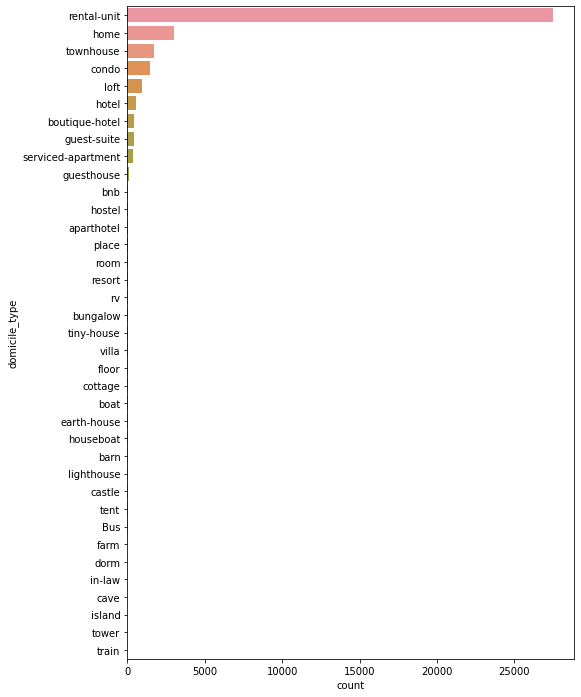

In [29]:
plt.figure(figsize = (8,12))
sns.countplot(y="domicile_type", data=listings, order = listings['domicile_type'].value_counts().index, orient='h')


### Key Observations:

Top Five domiciles types:
- Rental-Unit
- Home
- Townhouse
- Condo
- Loft

It appears many people are listing units that they might not own but, have certain rights to list on Airbnb. This makes sense for NYC many people rent apartments, instead of owning homes. To make money on the side they might stay with family or friends and list the unit.

### Approach:
We will observe how our Machine learning algorithm deals with that many types of domicile. We may reduce the levels with further groupings of categories with low sample sizes. 

### Drop property_type
removing this column from the data frame. 

In [30]:
listings.drop(['property_type'], axis=1, inplace = True)

# Mini Lab 

# 1) Data Preparation


Check remaining missing values and drop records

In [31]:
listings.isna().sum()

id                                   0
last_scraped                         0
name                                13
description                          0
neighborhood_overview                0
host_id                              0
host_name                            0
host_since                          23
host_location                      119
host_about                           0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_neighbourhood                   0
host_listings_count                 23
host_verifications                   0
neighbourhood                        0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
room_type                            0
accommodates                         0
bedrooms                             0
beds                               594
amenities                

Relatively small amount of missing values remaining after imputing in sections above. After dropping records with missing values we have 34460 records and 58 features with superhost as the target

In [32]:
listings = listings.dropna()
listings.shape


(34460, 59)

Examining Remaining columns, we will keep 'id' as an identifier and remove the following columns that are identifiers, repeate info contained in other columns, or not applicable to classification models due to too many unique values:

last_scraped
name
description
neighborhood_overview
host_id
host_name
host_since
host_location
host_about
host_verifications
neighbourhood
room_type
amenities
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
calculated_host_listings_count

In [33]:
listings.head()

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
0,2595,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,missing,86.330958,75.619603,Midtown,6,"['email', 'phone', 'reviews', 'offline_governm...","New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire home/apt,1,1,1,"[""Essentials"", ""Extra pillows and blankets"", ""...",150.0,30,1125,6,36,66,341,48,0,0,2009-11-21 00:00:00,2019-11-04 00:00:00,4.70,4.72,4.62,4.76,4.79,4.86,4.41,3,0.34,False,True,True,True,False,1.0,private,3635.0,150.0,150.0,entire,rental-unit
1,3831,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50.000000,88.000000,Clinton Hill,1,"['email', 'phone', 'reviews', 'offline_governm...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire home/apt,3,1,3,"[""Essentials"", ""TV with standard cable"", ""Baby...",75.0,1,730,0,1,7,212,408,68,0,2015-01-05 00:00:00,2021-06-29 00:00:00,4.46,4.59,4.50,4.79,4.81,4.72,4.65,1,5.09,False,True,True,True,False,1.0,private,2367.0,25.0,25.0,entire,guest-suite
3,5136,2021-08-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,missing,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within a day,88.000000,33.000000,Greenwood Heights,1,"['email', 'phone', 'reviews']",missing,Sunset Park,Brooklyn,40.66265,-73.99454,Entire home/apt,4,2,2,"[""TV with standard cable"", ""Long term stays al...",275.0,5,1125,7,9,9,184,1,0,0,2014-01-02 00:00:00,2014-01-02 00:00:00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,1,0.01,False,True,True,True,False,1.5,private,0.0,137.5,68.75,entire,rental-unit
4,5178,2021-08-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,within an hour,100.000000,100.000000,Hell's Kitchen,1,"['email', 'phone', 'facebook', 'reviews']","New York, United States",Midtown,Manhattan,40.76457,-73.98317,Private room,2,1,1,"[""Essentials"", ""Free street parking"", ""TV"", ""W...",61.0,2,14,3,7,14,255,485,12,4,2010-08-18 00:00:00,2021-07-18 00:00:00,4.20,4.19,3.71,4.65,4.40,4.86,4.35,1,3.63,False,True,False,True,False,1.0,private,3987.0,61.0,30.5,private-room,rental-unit
5,5203,2021-08-04,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,7490,MaryEllen,2009-02-05,"New York, New York, United States",Welcome to family life with my oldest two away...,missing,86.330958,75.619603,Upper West Side,

# Assumptions for Logistic Regression

1) Binary Dependent Variable - host_is_superhost is a boolean variable

2) Independent observations - Data is collected from webscrape. We will assume independence

3) Little or no Multi-collinearity - In the following section we will remove multi-collinearity

4) Linearity of independent variables and log odds - 

5) Sufficeitny Large Sample Size - 

## Check for Multi-Colinearity

Joe Corrleation plot and variable work

### Corr plot to check Multi-collinearity amongst continous variables

<AxesSubplot:>

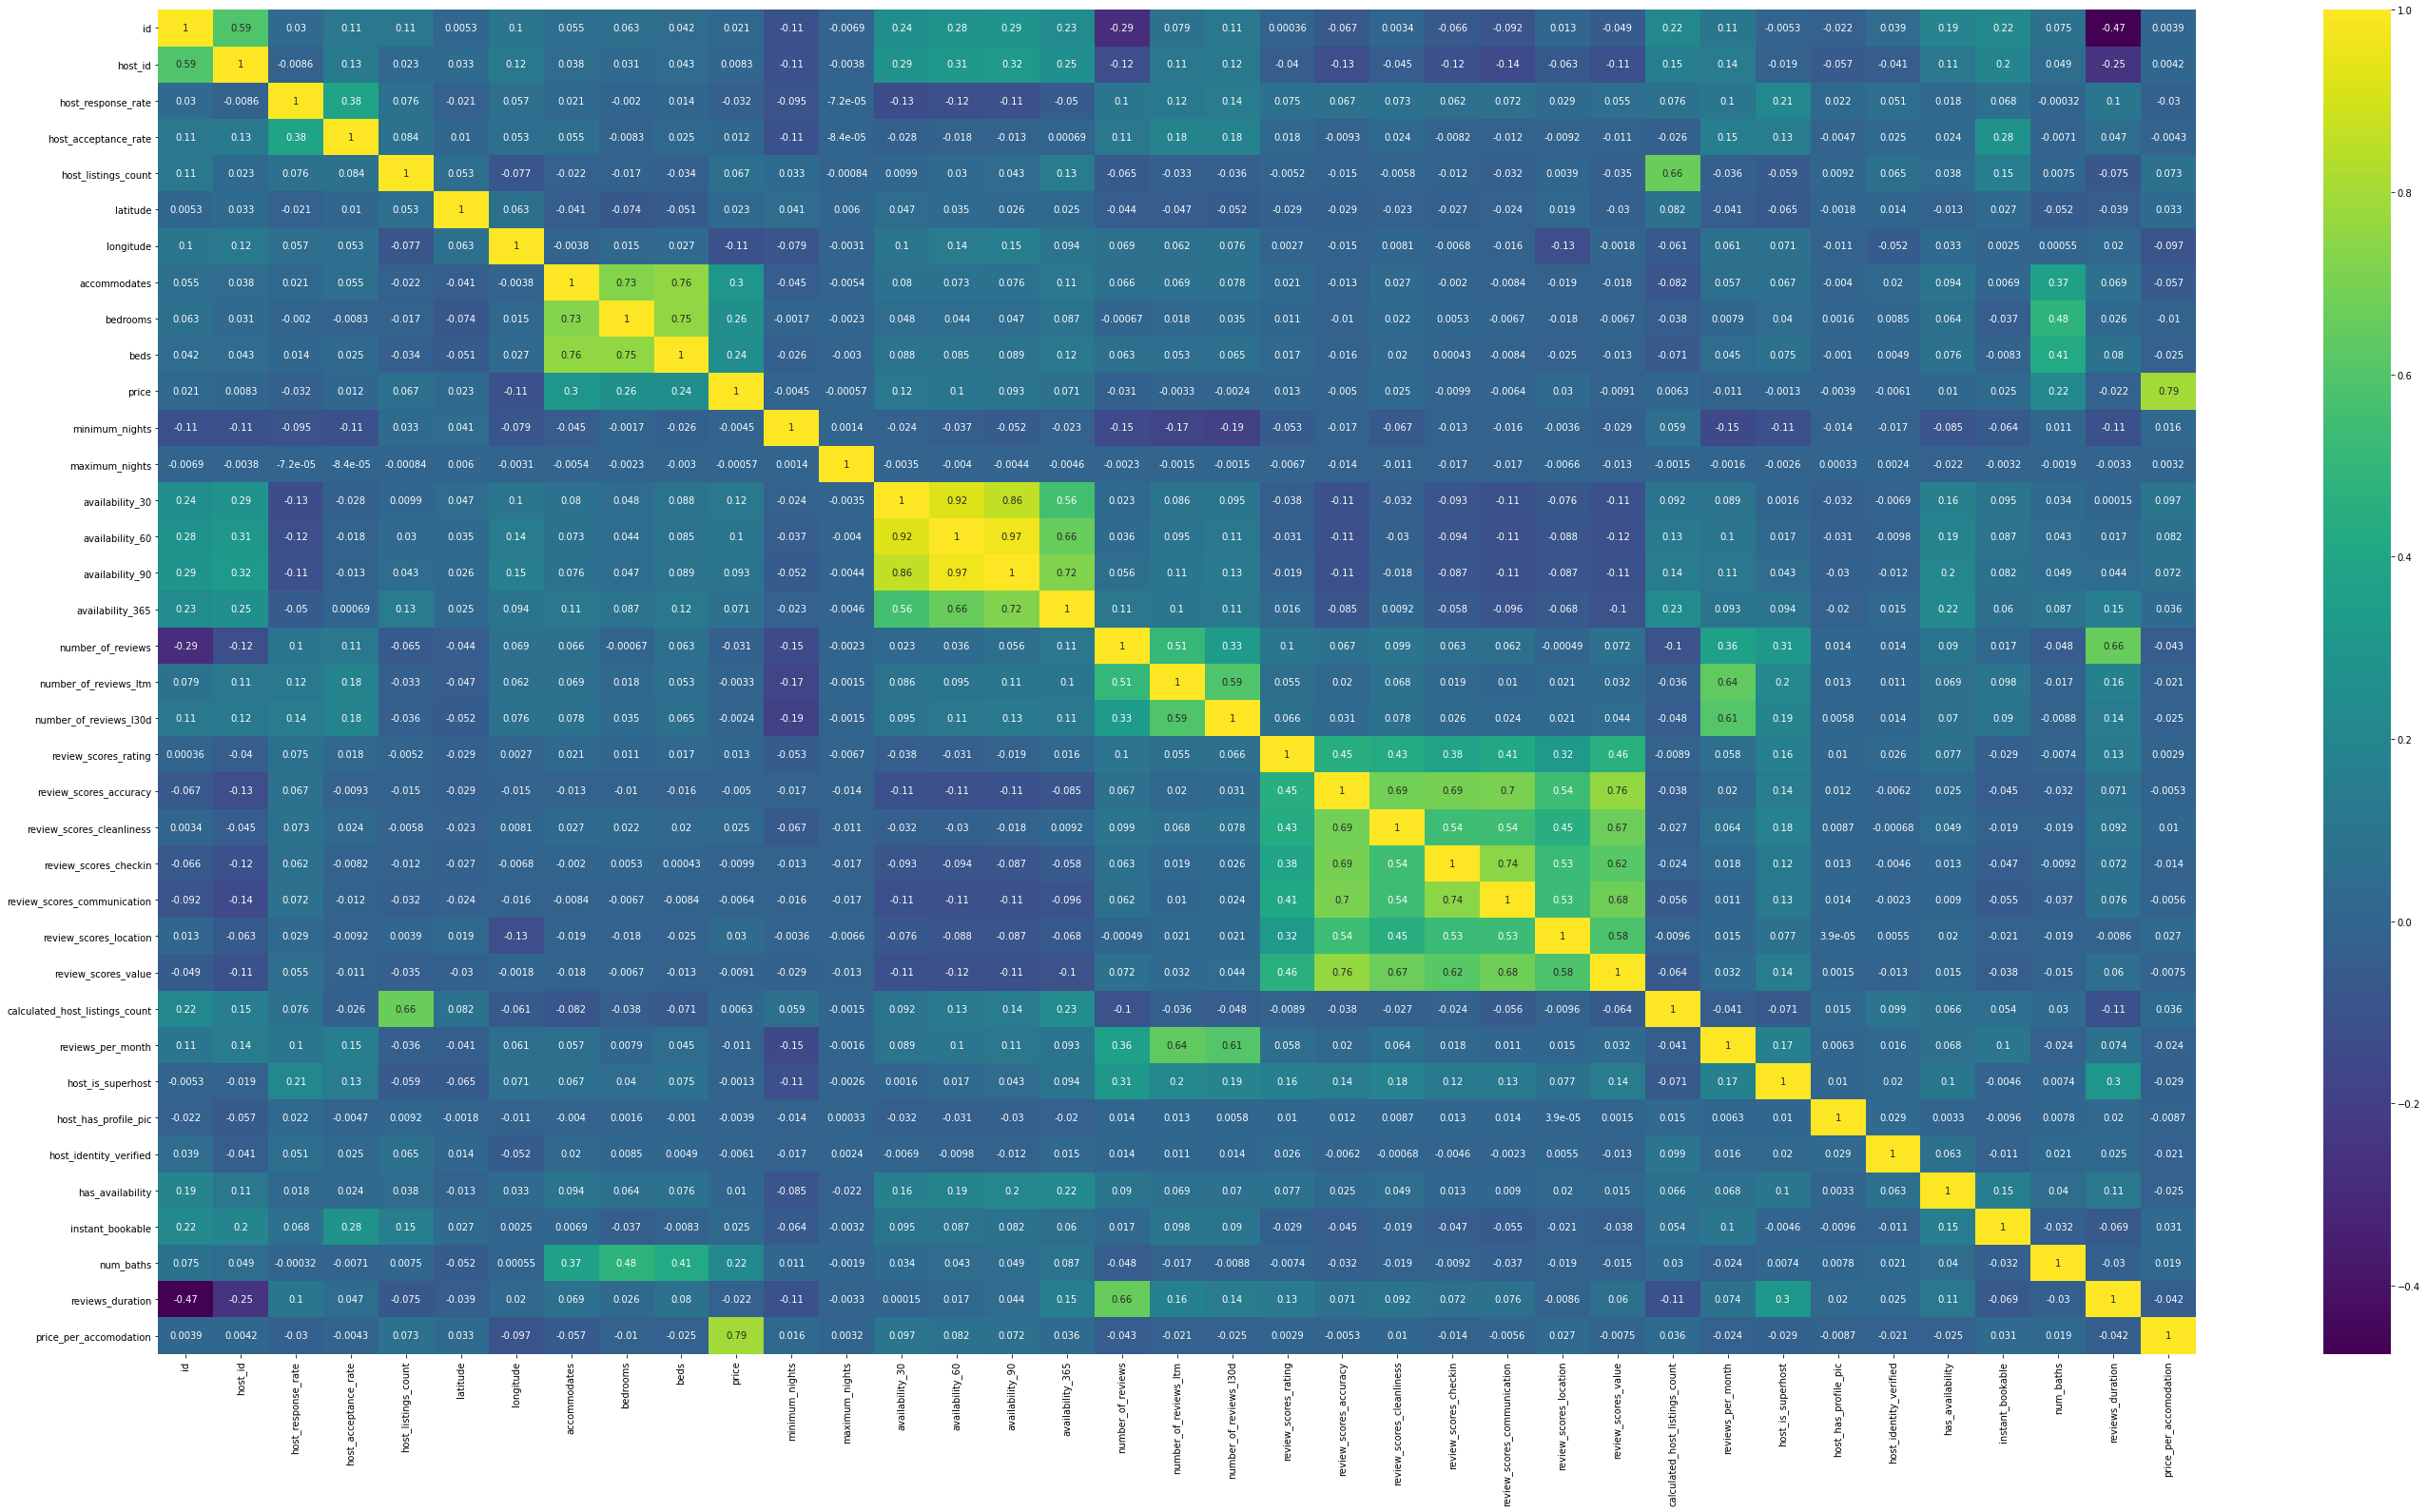

In [34]:
plt.figure(figsize=(48,26))
sns.heatmap(listings.corr(),annot=True,cmap='viridis')


### We can observe groupings of high correlations 

High Upper Right 

- host_id
- id

That mid upper left square of green-ish yellow

- Beds
- Bedrooms
- Accomodates 

That Center Grouping of mostly Yellow and green 

- availablity_30
- availablity_60
- availablity_90
- availablity_365

That diagonal to the right of availablity grouping

- number_of_reviews
- number_of_reviews_ltm
- number_of_130

Down and Right from there

- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value


One offs
1.  (0.66)
* host_listing_count
* calculated_host_listing_count

2. (0.79)
* price
* pirce_per_accommodation

3. (0.66)
* number_of_reviews
* reviews_duration

4. (0.64)
* number_of_reviews_ltm
* reviews_per_month_130d
* reviews_per_month



## Variable Selection
### Continous Variables


### Analysis of which variables to keep
To determin which variables we will keep a correlation plot of the variables against the dependent variable 'host_is_superhost' will inform us which varaibles have the highest correlation. We will then keep the highest ranking variable within the group. 

In [35]:
#mapping boolean value to 1 0 for correlation plot
# remember to drop superhost as well as host_is_superhost for modeling

listings['superhost'] = listings['host_is_superhost'].map({True:1,False:0})

<AxesSubplot:>

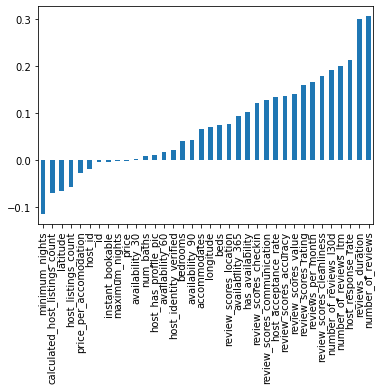

In [36]:
listings.corr()['superhost'].sort_values().drop(['superhost', 'host_is_superhost']).plot(kind='bar')

**here I am deleting variables that have high colinearity based on the observations from the correlation and which have a high ranking against superhost.**

1. number_of_reviews
2. reviews_duration (delete)
3. host_response_rate
4. number_of_reviews_ltm (delete)
5. number_of_reviews_130d (delete)
6. review_scores_cleanliness
7. reviewd_per_month (delete)
8. review_scores_rating (delete)
9. review_scores_value (delete)
10. review_scores_accuracy (delete)
11. review_scores_rating (delete)
12. host_acceptance_rate 
13. review_scores_communication (delete)
14. review_scores_checkin (delete)
15. has_availability
16. availability_365 
17. review_scores_location (delete)
18. beds 
19. longitude (delete)
20. accommodates (delete)
21. availability_90 (delete)
22. bedrooms (delete)
23. host_identity_verified
24. availability_60 (delete)
25. host_has_profile_pic
26. num_baths
**27. availability_30** (delete)
    last vairable with positive correlation to super host behind this variables are inversely related for instance price_per_accommodation is lower on the list than price both are correlated but because it is a strong negative corr it beats out price
    
28. price (delete)
29. maximum_nights
30. instant_bookable
31. id (delete)
32. host_id (delete)
33. price_per_accommodation
34. host_listings_count (delete)
35. latitude
36. calculated_host_listings_count
37. minimum_nights

### Dropping variables by creating a list of that will subset the dataframe into our modeling variables

In [37]:
drop_variables = ['superhost','last_scraped', 'name', 'description', 'neighborhood_overview', 'id', 'host_id', 'host_name', 'host_since',
                  'host_location', 'host_about', 'host_verifications', 'neighbourhood', 'amenities',
                  'number_of_reviews_l30d', 'first_review', 'last_review', 'reviews_duration', 'number_of_reviews_ltm', 
                  'number_of_reviews_l30d', 'reviews_per_month', 'review_scores_value', 
                  'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 
                  'review_scores_location' , 'longitude', 'accommodates', 'availability_90', 'bedrooms', 'availability_60',
                  'availability_30', 'price', 'host_listings_count', 'latitude' ]


listings_subset = listings.drop(drop_variables, axis=1)

print(listings_subset.shape)
print(listings_subset.columns)

# id=identifier, superhost=target, 24 remaining predictor features

(34460, 26)
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'room_type', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'calculated_host_listings_count', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'has_availability',
       'instant_bookable', 'num_baths', 'bath_type', 'price_per_bed',
       'price_per_accomodation', 'room_privacy', 'domicile_type'],
      dtype='object')


## Variable Selection
### Categorical Variables
### Next I'll go through each category columns and investigate the levels 

In [38]:
# Ton of different levels not appropriate for dummy variables and i don't know how to group these
# I suggest we drop this
listings_subset['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant           2529
Williamsburg                 2449
Harlem                       1820
Bushwick                     1601
Hell's Kitchen               1435
Upper West Side              1378
Midtown                      1373
Upper East Side              1284
East Village                 1121
Crown Heights                1107
Greenpoint                    764
Chelsea                       740
East Harlem                   684
Lower East Side               623
Astoria                       590
Washington Heights            575
West Village                  508
Financial District            423
Flatbush                      404
Prospect-Lefferts Gardens     380
Kips Bay                      378
Woodside                      371
Clinton Hill                  365
Long Island City              358
East Flatbush                 352
Flushing                      351
Murray Hill                   332
Fort Greene                   324
Park Slope                    306
Theater Distri

In [39]:
listings_subset = listings_subset.drop('neighbourhood_cleansed',axis=1)

In [40]:
# Ton of different levels not appropriate for dummy variables and i don't know how to group these
# I suggest we drop this
listings_subset['host_neighbourhood'].value_counts()

missing                                               6308
Williamsburg                                          2038
Bedford-Stuyvesant                                    1944
Bushwick                                              1303
Crown Heights                                         1211
Upper East Side                                       1074
Harlem                                                1046
Hell's Kitchen                                         959
Upper West Side                                        829
Greenpoint                                             698
Astoria                                                642
Jamaica                                                582
Flushing                                               556
Flatbush                                               519
East Harlem                                            508
East Village                                           508
Park Slope                                             4

In [41]:
listings_subset = listings_subset.drop('host_neighbourhood',axis=1)

In [42]:
#bouroughs seems like a good category to keep 
listings_subset['neighbourhood_group_cleansed'].value_counts() 

Manhattan        15067
Brooklyn         13559
Queens            4610
Bronx              930
Staten Island      294
Name: neighbourhood_group_cleansed, dtype: int64

In [43]:
#room type is good for dummy variables
listings_subset['room_type'].value_counts()

Entire home/apt    18536
Private room       15181
Shared room          524
Hotel room           219
Name: room_type, dtype: int64

In [44]:
#bath type is good for dummy variable
listings_subset['bath_type'].value_counts()

private    24081
shared     10379
Name: bath_type, dtype: int64

In [45]:
#room privacy
# This information is duplicated by the room type column lets drop
listings_subset['room_privacy'].value_counts

<bound method IndexOpsMixin.value_counts of 0              entire
1              entire
3              entire
4        private-room
5        private-room
7              entire
8        private-room
9        private-room
10       private-room
11             entire
12       private-room
13             entire
14             entire
15             entire
16             entire
17       private-room
18       private-room
20       private-room
21       private-room
22             entire
23       private-room
24             entire
25       private-room
26       private-room
27       private-room
29             entire
30       private-room
31             entire
32       private-room
33             entire
34             entire
35             entire
36       private-room
37             entire
38       private-room
39             entire
40             entire
41       private-room
42       private-room
43             entire
44       private-room
45       private-room
46             entire
47       p

In [46]:
listings_subset = listings_subset.drop('room_privacy',axis=1)

In [47]:
#going to need to group some of these into an other category
# we can talk about
listings_subset['domicile_type'].value_counts()

rental-unit           25810
home                   2831
townhouse              1627
condo                  1378
loft                    864
hotel                   506
guest-suite             375
boutique-hotel          371
serviced-apartment      305
guesthouse               66
bnb                      40
hostel                   37
place                    34
aparthotel               34
room                     26
resort                   23
bungalow                 22
rv                       19
tiny-house               17
villa                    17
floor                    14
cottage                  10
houseboat                 8
earth-house               7
boat                      7
barn                      3
lighthouse                1
farm                      1
dorm                      1
in-law                    1
cave                      1
castle                    1
tent                      1
tower                     1
train                     1
island              

In [48]:
listings_subset['domicile_type']=listings_subset['domicile_type'].replace(['train', 'in-law', 'tower', 'island','farm', 
                                                             'cave','dorm','lighthouse','Bus','castle','tent','barn',
                                                             'earth-house','houseboat','boat','cottage','floor','villa',
                                                             'tiny-house','rv','bungalow','resort','room','place',
                                                             'aparthotel'], 'OTHER')

In [49]:
listings_subset.head()

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,room_type,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,calculated_host_listings_count,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,price_per_bed,price_per_accomodation,domicile_type
0,missing,86.330958,75.619603,Manhattan,Entire home/apt,1,30,1125,341,48,4.70,4.62,3,False,True,True,True,False,1.0,private,150.0,150.0,rental-unit
1,within a day,50.000000,88.000000,Brooklyn,Entire home/apt,3,1,730,212,408,4.46,4.50,1,False,True,True,True,False,1.0,private,25.0,25.0,guest-suite
3,within a day,88.000000,33.000000,Brooklyn,Entire home/apt,2,5,1125,184,1,5.00,5.00,1,False,True,True,True,False,1.5,private,137.5,68.75,rental-unit
4,within an hour,100.000000,100.000000,Manhattan,Private room,1,2,14,255,485,4.20,3.71,1,False,True,False,True,False,1.0,private,61.0,30.5,rental-unit
5,missing,86.330958,75.619603,Manhattan,Private room,1,2,14,0,118,4.91,4.82,1,False,True,True,True,False,1.0,shared,75.0,75.0,rental-unit


## One-hot encode categorical variables then drop originals

Rick's one hot encoding. 

In [50]:
Categoricals_to_convert = ['host_response_time', 'neighbourhood_group_cleansed', 'bath_type', 'room_type', 'domicile_type']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(listings_subset[Categoricals_to_convert],drop_first=True)

#dropping original columns
modeling_df = listings_subset.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
modeling_df = pd.concat([modeling_df,dummies],axis=1)

#convert boolean variables to int so they can be included in VIF calculations
boolean_variables = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
modeling_df[boolean_variables] = modeling_df[boolean_variables].astype(int)

modeling_df.head()

,host_response_rate,host_acceptance_rate,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,calculated_host_listings_count,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,price_per_bed,price_per_accomodation,host_response_time_missing,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,bath_type_shared,room_type_Hotel room,room_type_Private room,room_type_Shared room,domicile_type_boutique-hotel,domicile_type_condo,domicile_type_guest-suite,domicile_type_guesthouse,domicile_type_home,domicile_type_hostel,domicile_type_hotel,domicile_type_loft,domicile_type_rental-unit,domicile_type_serviced-apartment,domicile_type_townhouse,domicile_type_OTHER
0,86.330958,75.619603,1,30,1125,341,48,4.70,4.62,3,0,1,1,1,0,1.0,150.0,150.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50.000000,88.000000,3,1,730,212,408,4.46,4.50,1,0,1,1,1,0,1.0,25.0,25.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,88.000000,33.000000,2,5,1125,184,1,5.00,5.00,1,0,1,1,1,0,1.5,137.5,68.75,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,100.000000,100.000000,1,2,14,255,485,4.20,3.71,1,0,1,0,1,0,1.0,61.0,30.5,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,86.330958,75.619603,1,2,14,0,118,4.91,4.82,1,0,1,1,1,0,1.0,75.0,75.0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Now that strings and categoricals have been converted, check VIF to see if anything was missed in correlation matrix evaluation.

Variables split into dummies are correlated within each other as expected. 

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = modeling_df.assign(const=1)
vif = vif.astype(float)
#X.dtypes

pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

host_response_rate                               7.223587
host_acceptance_rate                             1.404765
beds                                             1.505144
minimum_nights                                   1.107109
maximum_nights                                   1.000712
availability_365                                 1.557622
number_of_reviews                                1.184946
review_scores_rating                             1.244875
review_scores_cleanliness                        1.252984
calculated_host_listings_count                   1.264035
host_is_superhost                                1.271487
host_has_profile_pic                             1.004720
host_identity_verified                           1.030391
has_availability                                 1.145146
instant_bookable                                 1.209869
num_baths                                        1.301442
price_per_bed                                    3.370094
price_per_acco

## Create Train Test Split

We will use and 10 fold cross validation method for splitting. We have set the random_state seeding to 27 so that all models run use the same CV split assignments and performance can be compared when run multiple times

Create predictor variable matrix (X) and target matrix (y)

In [52]:
X = modeling_df.drop('host_is_superhost',axis=1).values
y = modeling_df['host_is_superhost'].values

In [53]:
from sklearn.model_selection import ShuffleSplit

#Need to add line to set seed for reproducibility

num_cv_iterations = 10 #Change to 10 fold for final optimization (longer compute time)
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2, random_state=27)

# 2) Logistic Regression starting 

Import modeling packages

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

Scale predictor variables, so that coefficient weights can be compared for significance after modeling

In [55]:
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X)
X = scl_obj.transform(X)

#  Assess Logistic Regression Performance

## Run base logistic regression model including all variables

Note that in the base model we are not making any adjustments to class weight

Load libraries needed for modeling & create a scoring dictionary for metrics used to compare models

In [56]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

scorer = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}


In [57]:
lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

cv_results = sklearn.model_selection.cross_validate(lr, X, y, cv=cv_object, scoring=scorer)
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())






{'fit_time': array([0.22004914, 0.20204568, 0.22805142, 0.18904257, 0.24205422,
       0.22204971, 0.23204374, 0.17503929, 0.24605513, 0.22105026]), 'score_time': array([0.00400066, 0.0040009 , 0.0040009 , 0.0040009 , 0.00400352,
       0.00413489, 0.00400066, 0.00400066, 0.00300097, 0.00400066]), 'test_accuracy': array([0.83415554, 0.84053976, 0.8354614 , 0.84619849, 0.84112014,
       0.83981428, 0.84402205, 0.83502612, 0.84358677, 0.83604179]), 'test_sensitivity': array([0.34341906, 0.34398782, 0.33979829, 0.36846276, 0.33359746,
       0.34779241, 0.34572785, 0.32684825, 0.34071146, 0.33749026]), 'test_specificity': array([0.95062837, 0.95751165, 0.94949134, 0.95328597, 0.95488455,
       0.95322264, 0.95593461, 0.95148921, 0.95663764, 0.95008023])}
Mean Accuracy =  0.8395966337782937
Mean Sensitivity =  0.34278356263617826
Mean Specificity =  0.9533166207727154


The base model including all predictor variables has a mean accuracy of 84% with a poor sensitivity of 29% ()

## Class Imbalance

Note that the superhost target variable we are trying to predict is imblanced. Plot below shows 18.5% Superhost and 81.5% non-super-host

array([<AxesSubplot:ylabel='host_is_superhost'>], dtype=object)

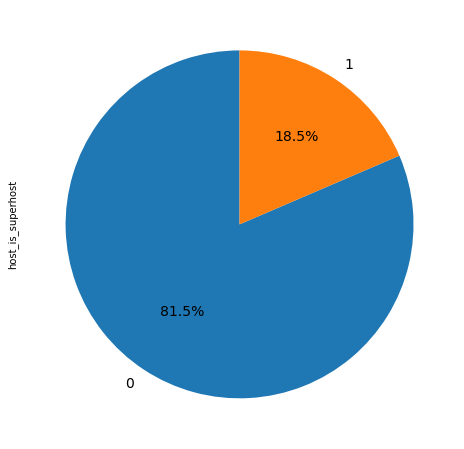

In [58]:
# host_is_super_host - Pie chart

superH = modeling_df.host_is_superhost.groupby(modeling_df.host_is_superhost).count()

superH.plot(kind='pie', subplots=True,startangle=90,
figsize=(8,8), autopct='%1.1f%%', textprops={'fontsize': 14})

In [59]:
lr2 = LogisticRegression(penalty='l2', C=1.0, class_weight="balanced", solver='liblinear' ) # get object

cv_results = sklearn.model_selection.cross_validate(lr2, X, y, cv=cv_object, scoring=scorer)
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())


{'fit_time': array([0.27500224, 0.18704224, 0.21504855, 0.1990447 , 0.21104741,
       0.19804406, 0.1940434 , 0.18204117, 0.25405717, 0.21704888]), 'score_time': array([0.00400066, 0.0040009 , 0.0040009 , 0.00400114, 0.00300074,
       0.0040009 , 0.00400043, 0.00400066, 0.0040009 , 0.00300097]), 'test_accuracy': array([0.76886245, 0.77161927, 0.77553685, 0.7671213 , 0.77248984,
       0.76494486, 0.77292513, 0.76929774, 0.7739408 , 0.75565873]), 'test_sensitivity': array([0.77534039, 0.77701674, 0.75562452, 0.79080824, 0.77812995,
       0.76607281, 0.77056962, 0.76108949, 0.77865613, 0.7482463 ]), 'test_specificity': array([0.76732496, 0.77034779, 0.78011779, 0.76181172, 0.77122558,
       0.76468488, 0.77345416, 0.77117888, 0.77288075, 0.75735425])}
Mean Accuracy =  0.7692396982008125
Mean Sensitivity =  0.7701554194997785
Mean Specificity =  0.7690380768867865


Using class_weight = balanced lowered the accuracy by 7% (to 77%) but drastically rebalanced the Sensitivity/Specificty tradeoff with sensitivity increasing from 29% to 77%

In [60]:
lr.fit(X,y)

weights = lr.coef_.T # take transpose to make a column vector
variable_names = modeling_df.drop('host_is_superhost',axis=1).columns #This is broken, need to fix to relect names that are in X

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.head(100)


,weight
review_scores_rating,1.914333
host_response_rate,0.931898
host_response_time_missing,-0.738688
number_of_reviews,0.458751
calculated_host_listings_count,-0.384396
review_scores_cleanliness,0.312440
host_response_time_within a day,-0.270079
domicile_type_hostel,-0.232496
has_availability,0.226563
domicile_type_rental-unit,-0.191789


Examining weights for all variables shows most have low significance. The top 7 are:
review_scores_rating
host_response_rate
host_response_time_missing
number_of_reviews
calculated_host_listings_count
review_scores_cleanliness
host_response_time_within a day


## Adjust Parameters of the model to make it more accurate

In [61]:
predictors = ['review_scores_rating','host_response_rate','host_response_time_missing','number_of_reviews','calculated_host_listings_count','review_scores_cleanliness','host_response_time_within a day']

#Create new X predictor matrix
X2 = modeling_df[predictors].values

#Scale new predictor matrix
scl_obj.fit(X2)
X2 = scl_obj.transform(X2)

cv_results = sklearn.model_selection.cross_validate(lr, X2, y, cv=cv_object, scoring=scorer)
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())

{'fit_time': array([0.01900387, 0.02000403, 0.02000427, 0.02100468, 0.02000427,
       0.01900411, 0.01900434, 0.01900387, 0.0180037 , 0.02000523]), 'score_time': array([0.00300121, 0.00300097, 0.00300097, 0.00300074, 0.00300074,
       0.0030005 , 0.00300074, 0.00300074, 0.00300074, 0.0030005 ]), 'test_accuracy': array([0.83125363, 0.842426  , 0.83241439, 0.84532792, 0.83517121,
       0.83589669, 0.83966918, 0.83110853, 0.84692397, 0.83299478]), 'test_sensitivity': array([0.33812405, 0.32115677, 0.33591932, 0.34231379, 0.33676704,
       0.35708753, 0.34810127, 0.31750973, 0.31225296, 0.34294622]), 'test_specificity': array([0.94829443, 0.96522051, 0.94663573, 0.95808171, 0.94689165,
       0.9462596 , 0.95007107, 0.94881398, 0.9671228 , 0.94508825])}
Mean Accuracy =  0.8373186302959953
Mean Sensitivity =  0.3352178675784205
Mean Specificity =  0.9522479735522851


In [62]:
#Use lr2 for balanced class weight

predictors = ['review_scores_rating','host_response_rate','host_response_time_missing','number_of_reviews','calculated_host_listings_count','review_scores_cleanliness','host_response_time_within a day']

#Create new X predictor matrix
X2 = modeling_df[predictors].values

#Scale new predictor matrix
scl_obj.fit(X2)
X2 = scl_obj.transform(X2)

cv_results = sklearn.model_selection.cross_validate(lr2, X2, y, cv=cv_object, scoring=scorer)
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())

{'fit_time': array([0.0170033 , 0.01700377, 0.01600361, 0.02100492, 0.01700377,
       0.01800394, 0.01700377, 0.01700377, 0.02000427, 0.02100468]), 'score_time': array([0.0030005 , 0.00300097, 0.00300074, 0.0030005 , 0.0030005 ,
       0.0040009 , 0.00300074, 0.00300074, 0.00300074, 0.00300074]), 'test_accuracy': array([0.76088218, 0.76407429, 0.76320371, 0.76044689, 0.75972142,
       0.7569646 , 0.7672664 , 0.76102728, 0.76610563, 0.74709808]), 'test_sensitivity': array([0.7730711 , 0.78386606, 0.74709077, 0.79318542, 0.76386688,
       0.75987607, 0.77689873, 0.75330739, 0.78418972, 0.74668745]), 'test_specificity': array([0.75798923, 0.75941198, 0.76691058, 0.75310835, 0.75879218,
       0.75629352, 0.76510306, 0.7627965 , 0.76204016, 0.74719201])}
Mean Accuracy =  0.7606790481717935
Mean Sensitivity =  0.768203959504834
Mean Specificity =  0.7589637575967051


In [63]:
The reduced feature model has lower performance on all metrics compared to the full model

SyntaxError: invalid syntax (<ipython-input-63-3728cd884751>, line 1)

# Tune hyperparameters

Since reducting model to the most important features did not improve performance, we will run a grid search to tune hyperparameters and see if performance improves

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

parameters = {
                'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                'C': [1, 10, 20],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'class_weight': [None, 'balanced'],
             }


clf = LogisticRegression()

grid_obj = GridSearchCV(lr, parameters, cv=cv_object, scoring='accuracy')
grid_obj = grid_obj.fit(X, y)

In [ ]:
print(grid_obj.best_estimator_.get_params())

print('Model accuracy is',grid_obj.score(X, y))

Reduced models with most important features (by weight) and tuning parameters did not significantly improve accuracy. The plot below shows the predicted probabilities of superhost do not have much separation between actual classes

In [ ]:
probs = lr.predict_proba(X)
probs = pd.DataFrame(probs)
probs = probs.rename(columns={probs.columns[0]: 'probability_not_superhost'})
probs = probs.rename(columns={probs.columns[1]: 'probability_superhost'})
#probs.head(100)
predictions = modeling_df.join(probs)

plt.figure()
sns.boxplot(x='host_is_superhost', y='probability_superhost', data=predictions)
#plt.ylim(0, 400)

# Examine data to look for resons why performance is not higher

One of the stated criteria from Airbnb to become a superhost is an overall review rating score greater than 4.8. This plot shows many records with a review rating less than criteria still classified as superhost

In [ ]:

ax = sns.boxplot(x="host_is_superhost", y="review_scores_rating", data=modeling_df)
plt.axhline(y=4.8, color='black')
plt.text(0.2,4.83,'Airbnb Minimum Criteria',rotation=0)
ax.set_ylim(4,5.1)

The data set has records based on individual property listings, and many hosts have multiple listings. The summary table below shows that superhost status is an overall status obtained by a host and applies to all of their listings (even those which may not meet criteria)

In [ ]:
#status_by_host = pd.DataFrame(pd.crosstab(listings.host_id, listings.host_is_superhost, normalize='index'))
status_by_host = listings.groupby(['host_id', 'host_is_superhost']).size().unstack(fill_value=0)

status_by_host.head(10)

# Model host level data instead of individual listing data to see if model performance inproves

Below we will create a a new data set with one record per host including whether they are a superhost overall or not

In [ ]:
temp = listings

rating_avg = temp.groupby('host_id')['review_scores_rating'].mean()
rating_avg= rating_avg.to_frame().rename(columns={'review_scores_rating':'rating_avg'}).reset_index()

rating_max = temp.groupby('host_id')['review_scores_rating'].max()
rating_max= rating_max.to_frame().rename(columns={'review_scores_rating':'rating_max'}).reset_index()

reviews_total = temp.groupby('host_id')['number_of_reviews'].sum()
reviews_total= reviews_total.to_frame().rename(columns={'number_of_reviews':'reviews_total'}).reset_index()

host_response_time_max = temp.groupby('host_id')['host_response_time'].max()
host_response_time_max= host_response_time_max.to_frame().rename(columns={'host_response_time':'response_time_max'}).reset_index()

host_response_rate_median = temp.groupby('host_id')['host_response_rate'].median()
host_response_rate_median= host_response_rate_median.to_frame().rename(columns={'host_response_rate':'response_rate_median'}).reset_index()

acceptance_rate_median = temp.groupby('host_id')['host_acceptance_rate'].median()
acceptance_rate_median= acceptance_rate_median.to_frame().rename(columns={'host_acceptance_rate':'acceptance_rate_median'}).reset_index()

total_nyc_listings = temp.groupby('host_id')['calculated_host_listings_count'].median()
total_nyc_listings= total_nyc_listings.to_frame().rename(columns={'calculated_host_listings_count':'total_nyc_listings'}).reset_index()

accommodates_median = temp.groupby('host_id')['accommodates'].median()
accommodates_median= accommodates_median.to_frame().rename(columns={'accommodates':'accommodates_median'}).reset_index()

price_median = temp.groupby('host_id')['price'].median()
price_median= price_median.to_frame().rename(columns={'price':'price_median'}).reset_index()

availability_60_median = temp.groupby('host_id')['availability_60'].median()
availability_60_median= availability_60_median.to_frame().rename(columns={'availability_60':'availability_60_median'}).reset_index()

reviews_duration_median = temp.groupby('host_id')['reviews_duration'].median()
reviews_duration_median= reviews_duration_median.to_frame().rename(columns={'reviews_duration':'reviews_duration_median'}).reset_index()

superhost_max = temp.groupby('host_id')['host_is_superhost'].max()
superhost_max= superhost_max.to_frame().rename(columns={'host_is_superhost':'superhost_max'}).reset_index()

data_frames = [rating_avg, rating_max, reviews_total, host_response_time_max, host_response_rate_median, acceptance_rate_median, 
total_nyc_listings, accommodates_median, price_median, availability_60_median, reviews_duration_median, superhost_max]

from functools import reduce
host_df = reduce(lambda  left,right: pd.merge(left,right,on=['host_id'], how='outer'), data_frames)

host_df.head(10)

Prepare host level data set for modeling with dummy variables for categoricals

In [ ]:
Categoricals_to_convert = ['response_time_max']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(host_df[Categoricals_to_convert],drop_first=True)

#dropping original columns
temp = host_df.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
host_df = pd.concat([temp,dummies],axis=1)

host_df.head()

Examine correlation matrix on host level data: rating_max and rating_avg are very highly correlated. We will drop rating_max

In [ ]:
plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(host_df.corr(),annot=True,cmap='viridis')

# Create and scale host level features

In [ ]:

#Create new X predictor matrix
X_host = host_df.drop(['superhost_max','rating_max'],axis=1).values
y_host = host_df['superhost_max'].values
y_host = y_host.astype(int)

#Scale new predictor matrix
scl_obj.fit(X_host)
X_host = scl_obj.transform(X_host)


# Logistic Regression for host level data

In [ ]:
cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer)
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())

Host level modeling improves accuracy to 86%.

While we would like to optimize performance further, the data available still shows an issue even at the host level summary statistics. Many of the hosts classified as superhosts still have even their overall average rating less than the 4.8 threshold required by airbnb.

The issue is likely due to a mismatch in timing on the records. Airbnb only updates their lists of superhosts 4 times per year. The ratings data is current as of the 8/4/21 collection while superhost status was last made on 7/1/21. It is likely that the superhosts with ratings less than 4.8 have fallen in this time lag and may lose their superhost status during the next airbnb grading round. We currenlty do not have a way to correct this issue without access to Airbnb's private data 


In [ ]:
sns.set(font_scale=1)
ax = sns.boxplot(x="superhost_max", y="rating_avg", data=host_df)
plt.axhline(y=4.8, color='black')
plt.text(0.2,4.83,'Airbnb Minimum Criteria',rotation=0)
ax.set_ylim(4,5.1)

# 3) Support Vector Machine (SVM)

joe

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics as mt
import random 


In [ ]:
# using the train test split and cross valudation object used in logistic regression we can iteritively run through CV 
random.seed(42)
for train_indices, test_indices in cv_object.split(X,y): 
    # New train and test variables created to be explicit and improve code readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

##  Train and Assess SVM Performance


In [ ]:
# train the model 
random.seed(42)
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

In [ ]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_)

## Apply Cross Validation to model

Apply cross validation provides a better expected arrucacy of our model 

In [ ]:
from sklearn.linear_model import LogisticRegression
random.seed(42) #Seed for reproducible results (42 answer to life the universe and everything)

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=3
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    svm_clf.fit(X_train,y_train)  # train object
    y_hat = svm_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   not anymore I set a random seed ^
#   so accuracy will be different each time

## Adjust Parameters of the model to make it more accurate

### Comparing Kernel type holding cost constant

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel:
    svm_clf=SVC(kernel = i, C = 1)
    svm_clf.fit(X_train, y_train)
    y_hat = svm_clf.predict(X_test) # get test set precitions
    print('For Kernel:' ,i)
    print('Accuracy is :', svm_clf.score(X_test, y_test))
    print('Recall is:', mt.recall_score(y_test, y_hat))

In [ ]:
With a constant cost function at 1, we compared using different types of kernels.  rbf performed the best, followed by sigmoid. 

### Comparing cost type holding cost constant with RBF Kernel.

In [ ]:
Cost = np.arange(0.5, 12.5, 0.5) #creat a numpy array of number from 0.5 to 12 with step size 0.5
for i in Cost:
    svm_clf=SVC(kernel = 'rbf', C = i)
    svm_clf.fit(X_train, y_train)
    y_hat = svm_clf.predict(X_test) # get test set precitions
    print('For Cost:' ,i)
    print('Accuracy is :', svm_clf.score(X_test, y_test))
    print('Recall is:', mt.recall_score(y_test, y_hat))

### Create a grid search on kernel and cost function

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

parameters = {
                'kernel': ['linear', 'rbf', 'poly'], 
                'C': [0, 0.5, 1]

             }


svm_clf = SVC()

grid_obj = GridSearchCV(svm_clf, parameters, cv=cv_object, scoring='accuracy')
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
print(grid_obj.best_estimator_.get_params())

print('Model accuracy is',grid_obj.score(X_test, y_test))

In [ ]:
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=3
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    svm_clf.fit(X_train,y_train)  # train object
    y_hat = svm_clf.predict(X_test)

In [ ]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=modeling_df.drop('host_is_superhost').columns)
weights.plot(kind='bar')

# 4) Discussion of advanatages of each classication model

## 5) Discussion of support vectors

### Discussion of insights they might provide into the data

Joe

In [ ]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = modeling_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['host_is_superhost'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
modeling_df['host_is_superhost'] = y # also add it back in for the original data
df_support.info()

In [ ]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['host_is_superhost'])
df_grouped = modeling_df.groupby(['host_is_superhost'])

# plot KDE of Different variables
vars_to_plot = ['review_scores_cleanliness','host_response_rate','host_response_time_missing','number_of_reviews']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Not super host','super host'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Not super host','Super host'])
    plt.title(v+' (Original)')

From the instances that were chosen as support vectors. (add in that code) A kernel density plot of host_is_superhost true vs false for only the instances that were chosen as support vectors (left column)  vs all of these instances (right). We can observe for the support vectors, the distributions are tightly coupled. The reason that is the instances that were chosen vectors fail right along the models soft margin. These instances that fall within soft margin are called support vectors. 